In [154]:

import numpy as np
import matplotlib.pyplot as plt
import math
import sys

from typing import Callable

not_quite_zero = sys.float_info.epsilon

In [155]:

def graph_function(func: Callable[[int], int],  title: str)->None:

    x = np.linspace(not_quite_zero, 200)
    y = np.array([func(xi) for xi in x ])

    plt.plot(x, y, label=title)

In [156]:
def ta_n(n: int):
    return 1000*n

def tb_n(n: int):
    return 200*(n*math.log(n))

def tc_n(n: int):
    return 10*math.pow(n,2)

def td_n(n: int):
    return math.pow(2,n)

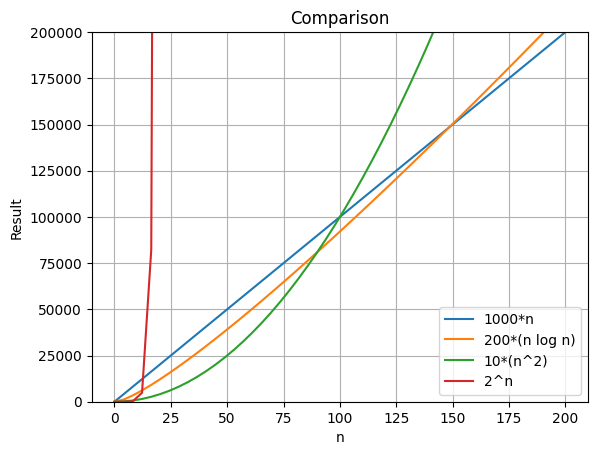

In [157]:
functions = [[ta_n, "1000*n"], [tb_n, "200*(n log n)"], [tc_n, "10*(n^2)"], [td_n, "2^n"]]

for fn in functions:
    graph_function(fn[0], fn[1])
plt.xlabel('n')
plt.ylabel('Result')
plt.title("Comparison")
plt.legend()
plt.ylim(0,200000)
plt.grid(True)
plt.show()